# Image Processing

## Load Data

In [1]:
#!pip install sk-video
#!pip install Pillow

#from google. colab import files
#uploaded = files. upload()

<class 'numpy.ndarray'>
(333, 500, 3)


array([[ 69,  71,  72, ..., 116, 114, 115],
       [ 67,  68,  69, ..., 117, 116, 115],
       [ 67,  67,  66, ..., 121, 119, 120],
       ...,
       [ 99,  96,  95, ...,  74,  72,  70],
       [ 94,  95,  95, ...,  75,  74,  74],
       [ 92,  94,  94, ...,  72,  71,  70]], dtype=uint8)

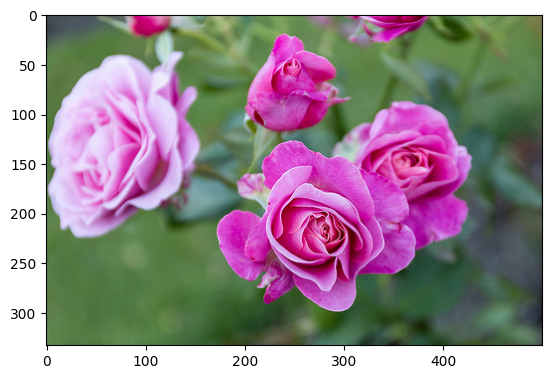

In [2]:
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot

# load the image
image = Image.open('data/Flowers for image classification.png')

# convert image to numpy array
data = asarray(image)
print(type(data))

# summarize shape
print(data.shape)

display(data[:,:,0])

# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

## Use entire range of data?

In [3]:
print("R ranges between ", data[:,:,0].max(), data[:,:,0].min())
print("B ranges between ", data[:,:,1].max(), data[:,:,1].min())
print("G ranges between ", data[:,:,2].max(), data[:,:,2].min())

R ranges between  255 9
B ranges between  249 0
G ranges between  255 0


## Filtering

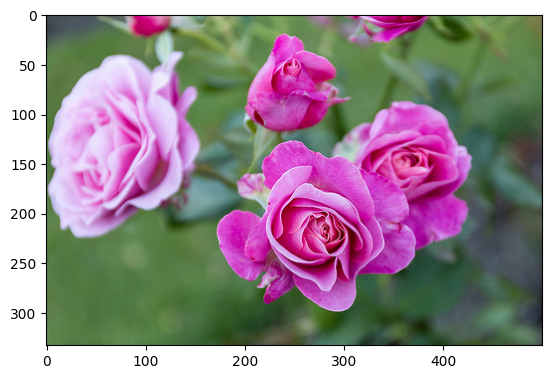

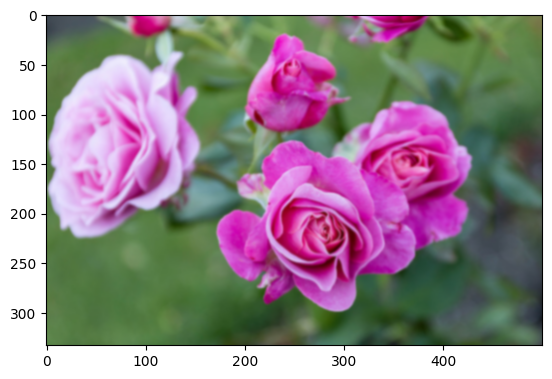

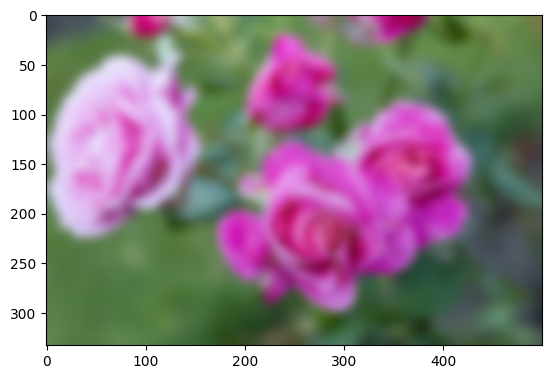

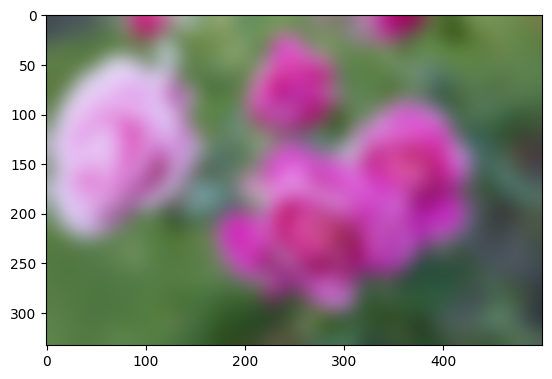

In [4]:
from scipy.ndimage import gaussian_filter

sigmas = [0, 1, 5, 10]
for std in sigmas:
  data_filtered = gaussian_filter(data, sigma=std)

  for c in [0,1,2]:
    data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

  pyplot.imshow(data_filtered)
  pyplot.show()

## K-Means: flower vs not flower

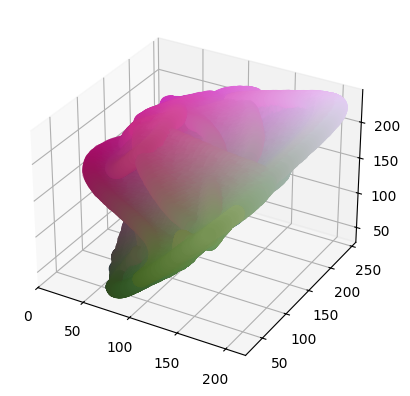

In [5]:
from matplotlib import pyplot as plt

pixel_array = data_filtered.reshape(data.shape[0]*data.shape[1], 3) 
pixel_array

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = pixel_array[:, 0]
xdata = pixel_array[:, 1]
ydata = pixel_array[:, 2]
pixel_array
ax.scatter3D(xdata, ydata, zdata, s=100, facecolor=pixel_array/255);

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


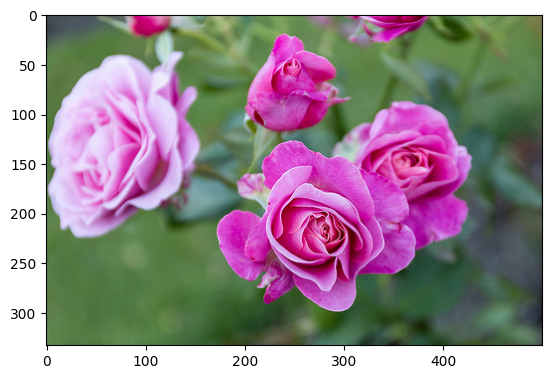

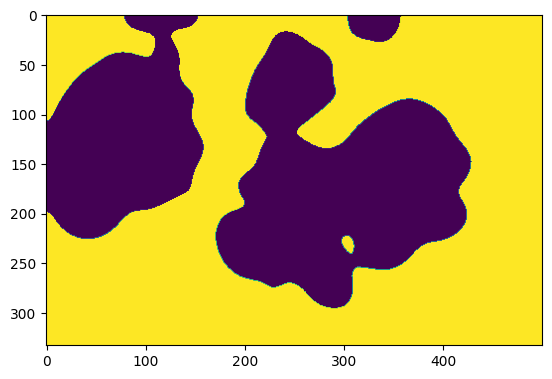

In [6]:
# Clustering by the color only
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
data_labels = kmeans.labels_
data_labels.shape

data_labels = data_labels.reshape(data.shape[0], data.shape[1])
data_labels.shape

pyplot.imshow(data)
pyplot.show()

pyplot.imshow(data_labels*255)
pyplot.show()

In [7]:
# We can use the positons as well
import numpy as np 

indices = np.array(list(np.ndindex(data[:,:,1].shape)))
indices
np.concatenate([pixel_array, indices], axis=1)

array([[ 67,  76,  84,   0,   0],
       [ 67,  76,  84,   0,   1],
       [ 67,  76,  84,   0,   2],
       ...,
       [ 77,  98,  84, 332, 497],
       [ 77,  97,  84, 332, 498],
       [ 77,  97,  84, 332, 499]])

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FIltered with sigma 0


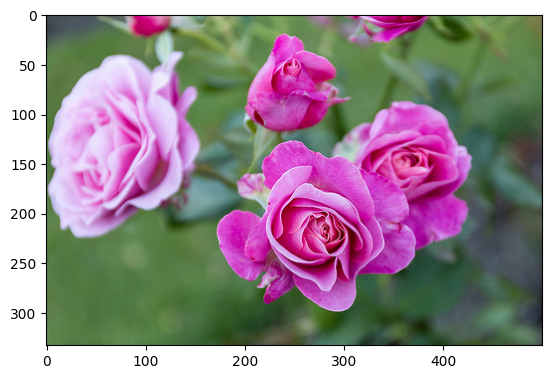

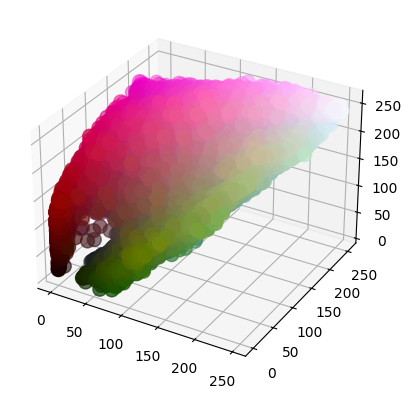

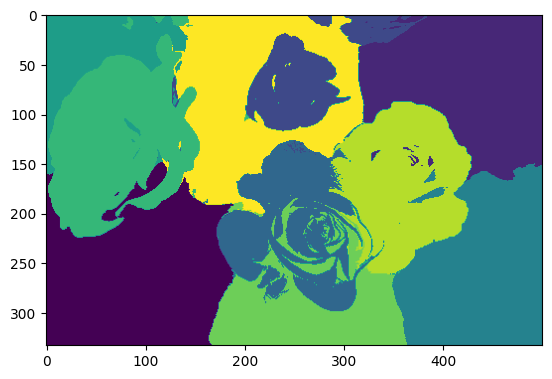

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FIltered with sigma 1


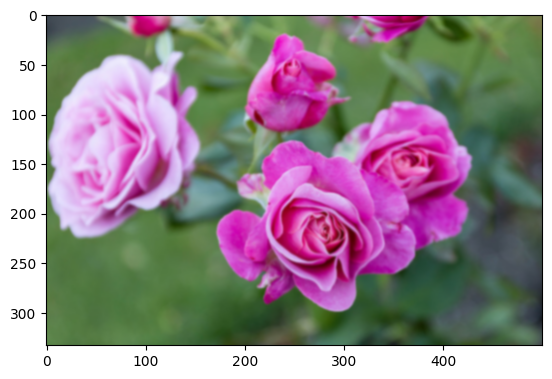

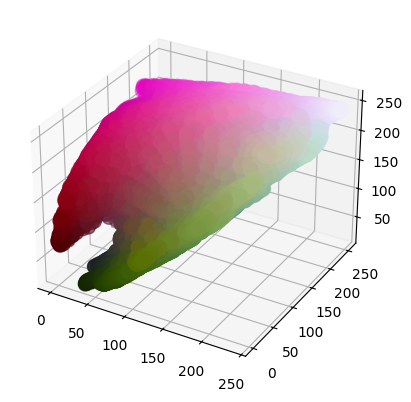

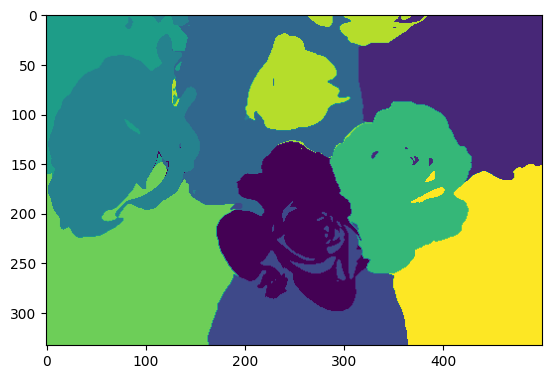

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FIltered with sigma 5


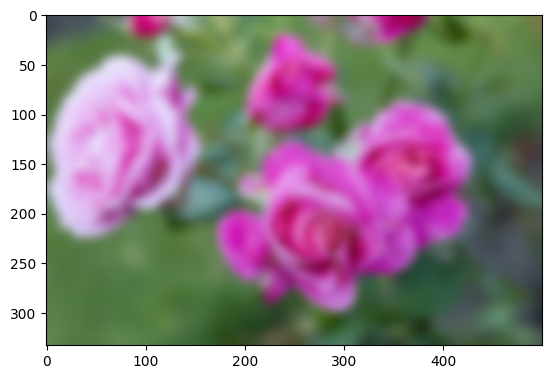

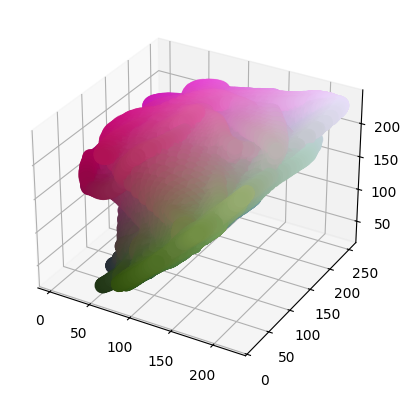

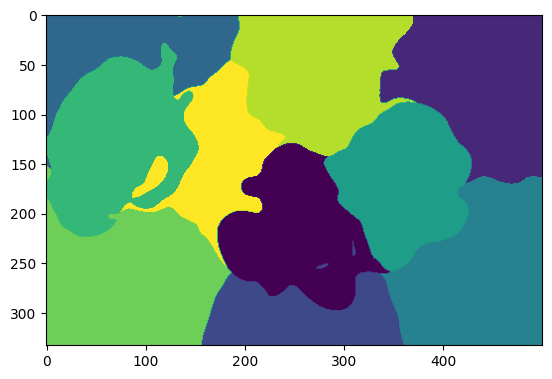

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FIltered with sigma 10


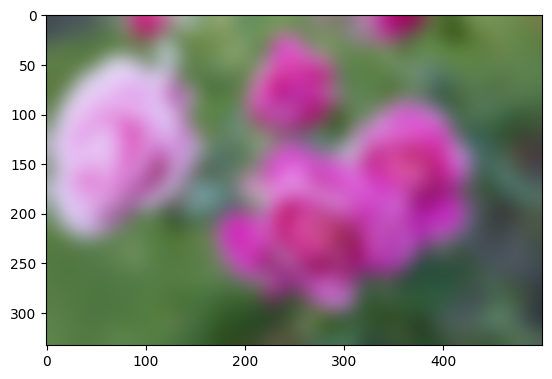

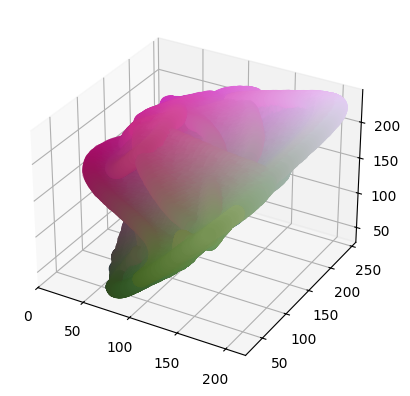

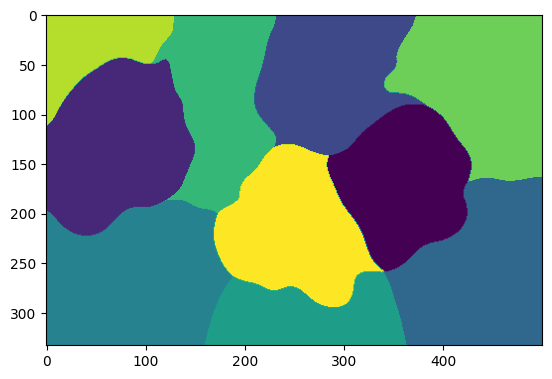

In [8]:
## Lets see it all together:
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Give 5 features to the kmeans: r,g,b,x,y when considering several clusters
#indices = np.array(list(np.ndindex(data[:,:,1].shape)))
#np.concatenate([pixel_array, indices], axis=1)

sigmas = [0, 1, 5, 10]
for std in sigmas:
  #data_filtered = gaussian_filter(data, sigma=std)

  for c in [0,1,2]:
    data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

  pixel_array = data_filtered.reshape(data.shape[0]*data.shape[1], 3) 

  #kmeans = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
  kmeans = KMeans(n_clusters=10, random_state=0).fit(np.concatenate([pixel_array, indices], axis=1))
  data_labels = kmeans.labels_

  data_labels = data_labels.reshape(data.shape[0], data.shape[1])

  #### DISPLAY THE PICTURE ####
  print(f'FIltered with sigma {std}')
  fig1 = plt.figure()
  pyplot.imshow(data_filtered)
  pyplot.show()

  #### DISPLAY THE PIXELS ####
  fig2 = plt.figure()
  ax = plt.axes(projection='3d')

  # Data for three-dimensional scattered points
  zdata = pixel_array[:, 0]
  xdata = pixel_array[:, 1]
  ydata = pixel_array[:, 2]
  ax.scatter3D(xdata, ydata, zdata, s=100, facecolor=pixel_array/255);

  #### DISPLAY THE LABEL ####
  fig3 = plt.figure()
  pyplot.imshow(data_labels/data_labels.max()*255)
  pyplot.show()

  print('\n\n\n')

## Segmentation

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

libpng warning: iCCP: known incorrect sRGB profile


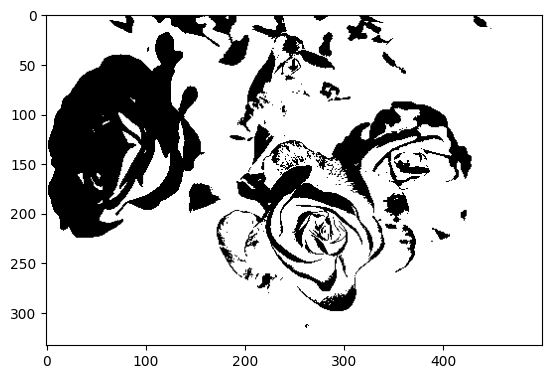

In [10]:


img = cv2.imread('data/Flowers for image classification.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

## Feature Extraction

In [11]:
import pandas as pd

# Give 5 features to the kmeans: r,g,b,x,y when considering several clusters
indices = np.array(list(np.ndindex(data[:,:,1].shape)))


data_labels = kmeans.labels_ # shaped like (100000, 1) again
data_labels = data_labels.reshape(data_labels.shape[0], 1)
data_labels.shape

features = np.concatenate([pixel_array, indices, data_labels], axis=1)
features.shape
features

features = pd.DataFrame(data=features, columns = ['R', 'G', 'B','x', 'y', 'Label'])
features.head()

R   G   B  x  y  Label
0  67  76  84  0  0      8
1  67  76  84  0  1      8
2  67  76  84  0  2      8
3  67  76  84  0  3      8
4  67  77  85  0  4      8

In [12]:
# Now it is a matter of being creative...

# SIZE
features.groupby(['Label'], as_index=True)[['R']].count()

# Mean color
features.groupby(['Label'], as_index=True)[['R', 'G', 'B']].mean()

# Mean std
features.groupby(['Label'], as_index=True)[['R', 'G', 'B']].std()

# MAX x and Y
features.groupby(['Label'], as_index=True)[['x', 'y']].agg(['max', 'min'])

# and many more! we could do:
#     -> avg distance between all the pixels
#     -> how close is it to a circle
#     -> etc etc etc 

x         y     
       max  min  max  min
Label                    
0      258   91  428  283
1      222   44  149    0
2      141    0  382  210
3      332  164  499  341
4      332  187  187    0
5      332  259  363  160
6      199    0  231  106
7      168    0  499  341
8      111    0  129    0
9      294  131  340  169

# Video Processing

## Load Data\

run this on Google CoLab
https://colab.research.google.com/drive/1gqZE3978AzkTkyKz7fEW3L-y7Gu5EpYp?authuser=0#scrollTo=lLhJl55ZfygL

In [13]:
# Clustering by the color only
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot
import numpy as np
import cv2

cap = cv2.VideoCapture("data/GreenScreenSimulation.mp4")

myvideo = []
count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if count < 200:
        myvideo.append(frame)
        count += 1

cap.release()
cv2.destroyAllWindows()

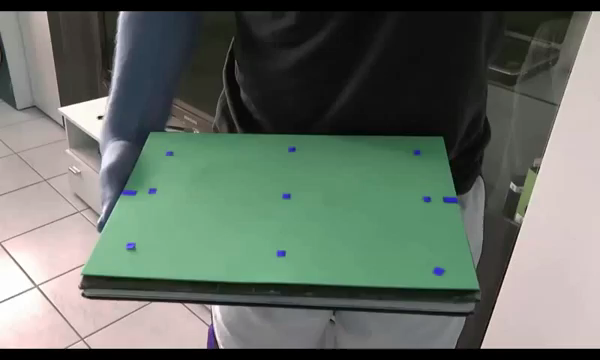

In [14]:
from PIL import Image

first_frame = myvideo[0][:,:,:]
img = Image.fromarray(first_frame, 'RGB')
img

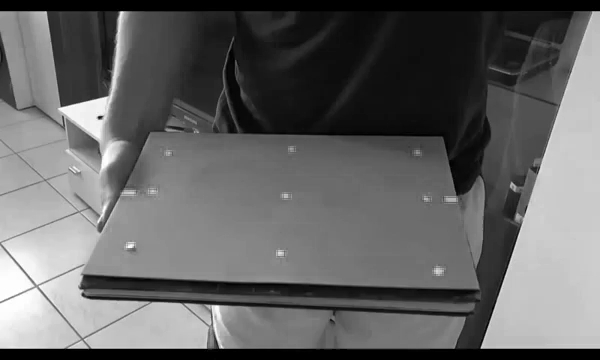

In [15]:
## Indexing instances of a video
img = Image.fromarray(first_frame[:,:,2], 'L')
img

## Get Green Pixels with Kmeans, AggClustering and DBScan

initial state


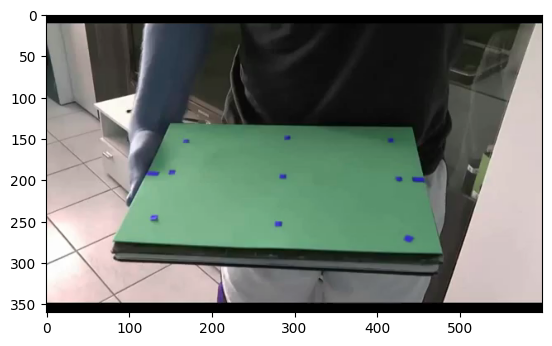

after filtering


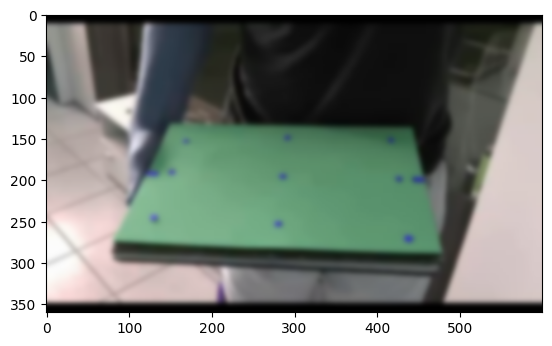

Clusters


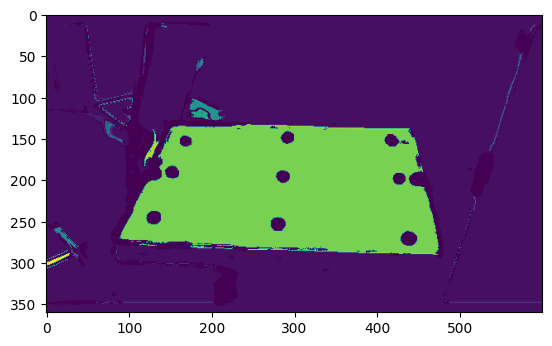

In [16]:
# Clustering by the color only
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.cluster import DBSCAN
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot
import numpy as np
import cv2

cap = cv2.VideoCapture("data/GreenScreenSimulation.mp4")

myvideo = []
count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if count < 200:
        myvideo.append(frame)
        count += 1

cap.release()
cv2.destroyAllWindows()

current_frame = myvideo[0][:,:,:]

print('initial state')
pyplot.imshow(current_frame)
pyplot.show()

for c in [0,1,2]:
  current_frame[:,:,c] = gaussian_filter(current_frame[:,:,c], sigma=3)

print('after filtering')
pyplot.imshow(current_frame)
pyplot.show()

pixel_array = current_frame.reshape(current_frame.shape[0]*current_frame.shape[1], 3)
pixel_array

indices = np.array(list(np.ndindex(current_frame[:,:,1].shape)))

#model = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
#model = KMeans(n_clusters=2, random_state=0).fit(pixel_array[:, 1].reshape(pixel_array.shape[0], 1))
#model = KMeans(n_clusters=2, random_state=0).fit(np.concatenate([pixel_array[:, 1].reshape(pixel_array.shape[0], 1), indices], axis=1))
#model = AC(n_clusters=2, linkage='ward').fit(pixel_array)
model = DBSCAN(eps=2, min_samples=40).fit(pixel_array)

data_labels = model.labels_
data_labels = data_labels.reshape(current_frame.shape[0], current_frame.shape[1])
data_labels.shape

print('Clusters')
pyplot.imshow(data_labels*255/data_labels.max())
pyplot.show()